In [2]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import creator, base, tools, algorithms

data = pd.read_excel('Project3_DistancesMatrix.xlsx', header=None) 

# Exclude first row and column, beacuse they are labels
### ATENTION: In the test, we will not receive like this
distances = data.values[1:, 1:]  

# 100 ecopoints, in this case
number_of_ecopoints = len(distances) - 1


def evalTSP(individual: list)-> tuple: 
    """
    Fitness of an individual. The fitness is the total distance of the route.

    Args:
        individual (list): Individual to evaluate

    Returns:
        tuple: Tuple with a float value of Fitness of the individual
    """    

    total_distance = sum(distances[individual[i-1] + 1][individual[i] + 1] for i in range(1, len(individual)))
    total_distance += distances[0][individual[0] + 1]
    total_distance += distances[individual[-1] + 1][0]
    
    # Return a tuple with a single value because it's a requisite of DEAP
    return (total_distance,)  


# -----------------------------------------------------------------------------------------------------------------------------------

# FitnessMin is a class inherited from base.Fitness and it has weights and values attributes
# Individual is a list of integers (ecopoints)
# weights = (-1.0,) because we want to minimize the total distance, (1.0) if we want to maximize
# Toolbox is a container for the tools that will be used to manipulate the individuals

# Register genetic operators
# mate: cxOrdered - order crossover
# mutate: mutShuffleIndexes - shuffle mutation
# select: selTournament - tournament selection


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
"""
#toolbox.register("indices", nearest_neighbor_tour, distances)
toolbox.register("indices", np.random.permutation, len(distances))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.00)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

"""

toolbox.register("indices", np.random.permutation, range(number_of_ecopoints)) 
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic operators
# mate: cxOrdered - order crossover
# mutate: mutShuffleIndexes - shuffle mutation
# select: selTournament - tournament selection

toolbox.register("mate", tools.cxOrdered) # cxOrdered - order crossover CANNOT BE USED
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
#toolbox.register("mutate", customMutShuffleIndexes, indpb=0.10)
#toolbox.register("mate", customCxOrdered)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)



# -----------------------------------------------------------------------------------------------------------------------------------

n_populations = 10 * 1000 
n_generations = 10 * n_populations 
prob_mutation = 0.05 # 0.01, 0.05, 0.1, 0.2
prob_crossover = 0.8 # 0.5, 0.6, 0.7, 0.8
convergence_generations = n_generations//10 * 2   # Number of generations over which to check for convergence
convergence_threshold = 0.0001  # The relative change in best fitness that signifies convergence

# Population
pop = toolbox.population(n=n_populations)

# Hall of fame of 1 best individual
hof = tools.HallOfFame(1)

# Lists to store the fitness evolution
best_fitness_evolution = []
avg_fitness_evolution = []
min_fitness_evolution = []
max_fitness_evolution = []

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

print("Start of evolution")

start_time = time.time()
timeout = 240 * 60  # minutes x seconds || 4h

# Run the evolution
gen = 0
converged = False
while time.time() - start_time < timeout and gen < n_generations and not converged:
    gen += 1
    # Select and clone the next generation individuals
    offspring = map(toolbox.clone, toolbox.select(pop, len(pop)))
    
    # Apply crossover and mutation on the offspring
    offspring = algorithms.varAnd(offspring, toolbox, cxpb=prob_crossover, mutpb=prob_mutation)

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # Replace the current population by the offspring
    pop[:] = offspring

    # Update the hall of fame with the generated individuals
    hof.update(pop)

    # Record the stats of the current generation
    record = stats.compile(pop)
    print(f"Generation {gen}: {record}")

    # Record the best, avg, min and max fitness from this generation to the lists
    best_fitness_evolution.append(hof[0].fitness.values[0])
    avg_fitness_evolution.append(record["avg"])
    min_fitness_evolution.append(record["min"])
    max_fitness_evolution.append(record["max"])

    # Check for convergence: if the best fitness has not improved significantly for a certain number of generations
    if gen >= convergence_generations:
        relative_change = (best_fitness_evolution[-convergence_generations] - best_fitness_evolution[-1]) / best_fitness_evolution[-convergence_generations]
        if abs(relative_change) < convergence_threshold:
            print("Convergence reached")
            converged = True

# Best individual
print(f"Best individual is: {hof[0]}, {len(hof[0])} \nwith fitness: {hof[0].fitness}")

c:\Users\leo_b\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\leo_b\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Start of evolution
Generation 1: {'avg': 335.45314, 'min': 265.30000000000007, 'max': 411.90000000000003}
Generation 2: {'avg': 323.12298, 'min': 262.40000000000003, 'max': 383.4999999999998}
Generation 3: {'avg': 314.55423, 'min': 255.10000000000002, 'max': 369.1000000000001}
Generation 4: {'avg': 306.83100999999994, 'min': 238.90000000000003, 'max': 365.9000000000001}
Generation 5: {'avg': 300.18046, 'min': 245.1, 'max': 359.10000000000014}
Generation 6: {'avg': 294.92751, 'min': 240.70000000000007, 'max': 355.9000000000001}
Generation 7: {'avg': 289.88423, 'min': 235.1999999999999, 'max': 353.6000000000001}
Generation 8: {'avg': 284.85065, 'min': 233.10000000000005, 'max': 357.0}
Generation 9: {'avg': 280.39388, 'min': 226.60000000000005, 'max': 345.99999999999994}
Generation 10: {'avg': 276.25359000000003, 'min': 220.29999999999993, 'max': 353.50000000000006}
Generation 11: {'avg': 272.50339, 'min': 220.29999999999993, 'max': 339.8999999999999}
Generation 12: {'avg': 269.09424, 'mi

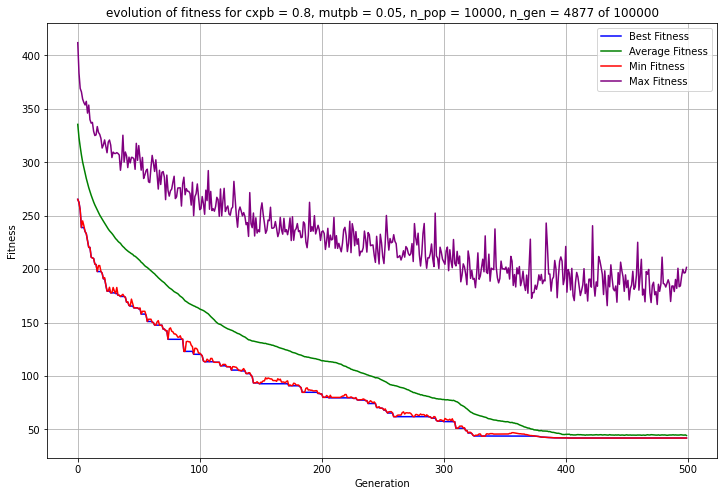

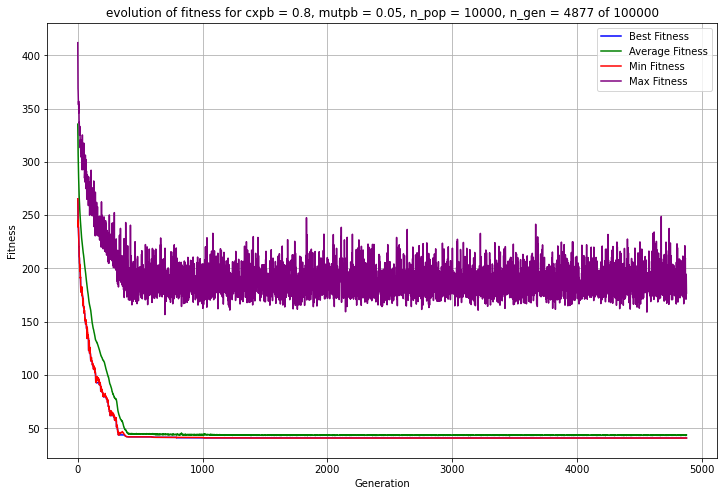

In [9]:
# Plot the evolution of the fitness
def plot_evolution(which_stats,cxpb, mutpb, n_pop, n_gen):
    plt.figure(figsize=(12, 8))
    if "fitness" in which_stats:
        plt.plot(best_fitness_evolution, label='Best Fitness', color='blue')
    if "avg" in which_stats:
        plt.plot(avg_fitness_evolution, label='Average Fitness', color='green')
    if "min" in which_stats:
        plt.plot(min_fitness_evolution, label='Min Fitness', color='red')
    if "max" in which_stats:
        plt.plot(max_fitness_evolution, label='Max Fitness', color='purple')
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"evolution of fitness for cxpb = {cxpb}, mutpb = {mutpb}, n_pop = {n_pop}, n_gen = {n_gen} of {n_generations}")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_evolution_with_x_cap(which_stats,cxpb, mutpb, n_pop, n_gen,where_we_stop_x):
    plt.figure(figsize=(12, 8))
    if "fitness" in which_stats:
        plt.plot(best_fitness_evolution[:where_we_stop_x], label='Best Fitness', color='blue')
    if "avg" in which_stats:
        plt.plot(avg_fitness_evolution[:where_we_stop_x], label='Average Fitness', color='green')
    if "min" in which_stats:
        plt.plot(min_fitness_evolution[:where_we_stop_x], label='Min Fitness', color='red')
    if "max" in which_stats:
        plt.plot(max_fitness_evolution[:where_we_stop_x], label='Max Fitness', color='purple')
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"evolution of fitness for cxpb = {cxpb}, mutpb = {mutpb}, n_pop = {n_pop}, n_gen = {n_gen} of {n_generations}")
    plt.legend()
    plt.grid(True)
    plt.show()

aaa = 500
plot_evolution_with_x_cap(["fitness", "avg", "min", "max"], prob_crossover, prob_mutation, n_populations, gen, aaa)

plot_evolution(["fitness", "avg", "min", "max"], prob_crossover, prob_mutation, n_populations, gen)

In [2]:
import time
import matplotlib.pyplot as plt

import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import creator, base, tools, algorithms

data = pd.read_excel('Project3_DistancesMatrix.xlsx', header=None) 

# Exclude first row and column, beacuse they are labels
### ATENTION: In the test, we will not receive like this
distances = data.values[1:, 1:]  

# 100 ecopoints, in this case
number_of_ecopoints = len(distances) - 1


def evalTSP(individual: list)-> tuple: 
    """
    Fitness of an individual. The fitness is the total distance of the route.

    Args:
        individual (list): Individual to evaluate

    Returns:
        tuple: Tuple with a float value of Fitness of the individual
    """    

    total_distance = sum(distances[individual[i-1] + 1][individual[i] + 1] for i in range(1, len(individual)))
    total_distance += distances[0][individual[0] + 1]
    total_distance += distances[individual[-1] + 1][0]
    
    # Return a tuple with a single value because it's a requisite of DEAP
    return (total_distance,)  


# -----------------------------------------------------------------------------------------------------------------------------------

# FitnessMin is a class inherited from base.Fitness and it has weights and values attributes
# Individual is a list of integers (ecopoints)
# weights = (-1.0,) because we want to minimize the total distance, (1.0) if we want to maximize
# Toolbox is a container for the tools that will be used to manipulate the individuals

# Register genetic operators
# mate: cxOrdered - order crossover
# mutate: mutShuffleIndexes - shuffle mutation
# select: selTournament - tournament selection


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
"""
#toolbox.register("indices", nearest_neighbor_tour, distances)
toolbox.register("indices", np.random.permutation, len(distances))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.00)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

"""

toolbox.register("indices", np.random.permutation, range(number_of_ecopoints)) 
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic operators
# mate: cxOrdered - order crossover
# mutate: mutShuffleIndexes - shuffle mutation
# select: selTournament - tournament selection

toolbox.register("mate", tools.cxOrdered) # cxOrdered - order crossover CANNOT BE USED
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
#toolbox.register("mutate", customMutShuffleIndexes, indpb=0.10)
#toolbox.register("mate", customCxOrdered)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)



# seed for reproducibility
random.seed(169)

n_populations = 1000 
n_generations = 10 * n_populations 
prob_mutation = 0.01 # 0.01, 0.05, 0.1, 0.2
prob_crossover = 0.8 # 0.5, 0.6, 0.7, 0.8
convergence_generations = n_generations//10  # Number of generations over which to check for convergence
convergence_threshold = 0.0001  # The relative change in best fitness that signifies convergence

# Population
pop = toolbox.population(n=n_populations)

# Hall of fame of 1 best individual
hof = tools.HallOfFame(1)

# Lists to store the fitness evolution
best_fitness_evolution = []
avg_fitness_evolution = []
min_fitness_evolution = []
max_fitness_evolution = []

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

print("Start of evolution")

start_time = time.time()
timeout = 19 * 60  # minutes x seconds

# Run the evolution
gen = 0
converged = False
while time.time() - start_time < timeout and gen < n_generations and not converged:
    gen += 1
    # Select and clone the next generation individuals
    offspring = map(toolbox.clone, toolbox.select(pop, len(pop)))
    
    # Apply crossover and mutation on the offspring
    offspring = algorithms.varAnd(offspring, toolbox, cxpb=prob_crossover, mutpb=prob_mutation)

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # Replace the current population by the offspring
    pop[:] = offspring

    # Update the hall of fame with the generated individuals
    hof.update(pop)

    # Record the stats of the current generation
    record = stats.compile(pop)
    print(f"Generation {gen}: {record}")

    # Record the best, avg, min and max fitness from this generation to the lists
    best_fitness_evolution.append(hof[0].fitness.values[0])
    avg_fitness_evolution.append(record["avg"])
    min_fitness_evolution.append(record["min"])
    max_fitness_evolution.append(record["max"])

    # Check for convergence: if the best fitness has not improved significantly for a certain number of generations
    if gen >= convergence_generations:
        relative_change = (best_fitness_evolution[-convergence_generations] - best_fitness_evolution[-1]) / best_fitness_evolution[-convergence_generations]
        if abs(relative_change) < convergence_threshold:
            print("Convergence reached")
            converged = True

# Best individual
print(f"Best individual is: {hof[0]}, {len(hof[0])} \nwith fitness: {hof[0].fitness}")


Start of evolution
Generation 1: {'avg': 336.35859999999997, 'min': 282.5, 'max': 388.2}
Generation 2: {'avg': 323.7437, 'min': 277.49999999999994, 'max': 376.09999999999985}
Generation 3: {'avg': 314.63269999999994, 'min': 260.6, 'max': 356.69999999999993}
Generation 4: {'avg': 306.9592999999999, 'min': 256.7000000000001, 'max': 360.9000000000001}
Generation 5: {'avg': 300.61809999999997, 'min': 253.00000000000003, 'max': 352.1000000000001}
Generation 6: {'avg': 294.92460000000005, 'min': 251.80000000000004, 'max': 347.7999999999999}
Generation 7: {'avg': 289.3605, 'min': 246.20000000000005, 'max': 344.6}
Generation 8: {'avg': 285.8061, 'min': 239.50000000000009, 'max': 335.29999999999995}
Generation 9: {'avg': 280.22760000000005, 'min': 229.39999999999998, 'max': 355.1}
Generation 10: {'avg': 276.4119, 'min': 231.89999999999998, 'max': 324.8999999999999}
Generation 11: {'avg': 273.1555, 'min': 221.79999999999998, 'max': 326.89999999999986}
Generation 12: {'avg': 270.7725, 'min': 225.